In [2]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


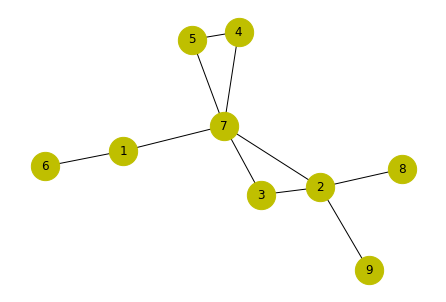

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
vertices = range(1,10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True,node_color='y',node_size=800)

Degree Centrality

In [4]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

Betweeness Centrality

In [5]:
nx.betweenness_centrality(G)

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

Closeness Centrality

In [6]:
nx.closeness_centrality(G)

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

In [7]:
centrality = nx.eigenvector_centrality(G)

In [8]:
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

[(1, '0.24'),
 (2, '0.45'),
 (3, '0.36'),
 (4, '0.32'),
 (5, '0.32'),
 (6, '0.08'),
 (7, '0.59'),
 (8, '0.16'),
 (9, '0.16')]

Latihan

[('Allen', '0.05'),
 ('Bob', '0.35'),
 ('Emma', '0.40'),
 ('Jill', '0.48'),
 ('John', '0.35'),
 ('Leah', '0.29'),
 ('Lisa', '0.01'),
 ('Liz', '0.20'),
 ('Mike', '0.29'),
 ('Shane', '0.40')]

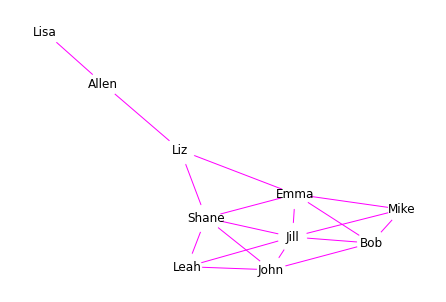

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
vertices = range(0)
edges = [( 'Jill','Bob'), ('Jill','John'), 
         ('Jill','Leah'), ('Jill','Shane'), 
         ('Jill','Emma'), ('Jill','Mike'),
         ('Bob','Mike'),('Bob','John'),
         ('Mike','Emma'),('John','Leah'),
         ('Leah','Shane'),('Emma','Liz'),
         ('Shane','Liz'),('Shane','Emma'),
         ('Liz','Allen'),('Allen','Lisa'),
         ('Bob','Emma'),('John','Shane')]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True,edge_color='#FF00FF',node_color='w',node_size=800)

centrality = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

Latihan

[(1, '0.29'),
 (2, '0.60'),
 (3, '0.29'),
 (4, '0.10'),
 (5, '0.10'),
 (6, '0.44'),
 (7, '0.16'),
 (8, '0.16'),
 (9, '0.16'),
 (10, '0.10'),
 (11, '0.21'),
 (12, '0.21'),
 (13, '0.10'),
 (14, '0.16'),
 (15, '0.21')]

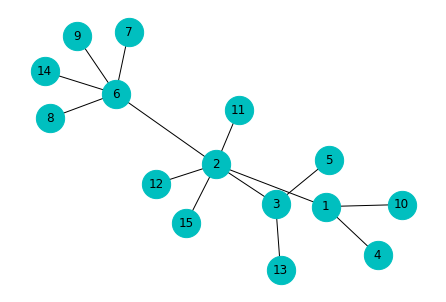

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
vertices = range(1,16)
edges = [(6,9), (6,7), (6,14), (6,8), (6,2), (2,11),(2,15),(2,12),(2,1),(2,3),(3,13),(3,5),(2,1),(1,4),(1,10)]
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
nx.draw(G, with_labels=True,node_color='c',node_size=800)

centrality = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

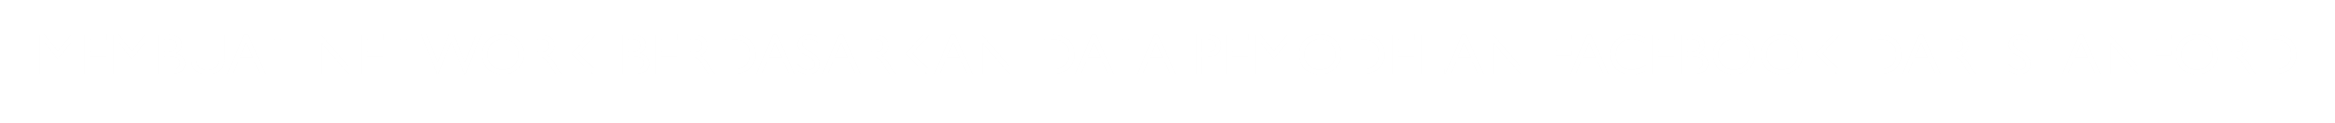

Membuat Network berdasarkan data pemodelan facebook dari Stanford

In [12]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [13]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


(-0.9747684392333031,
 1.187647679746151,
 -1.1595337215065957,
 0.8798292103409768)

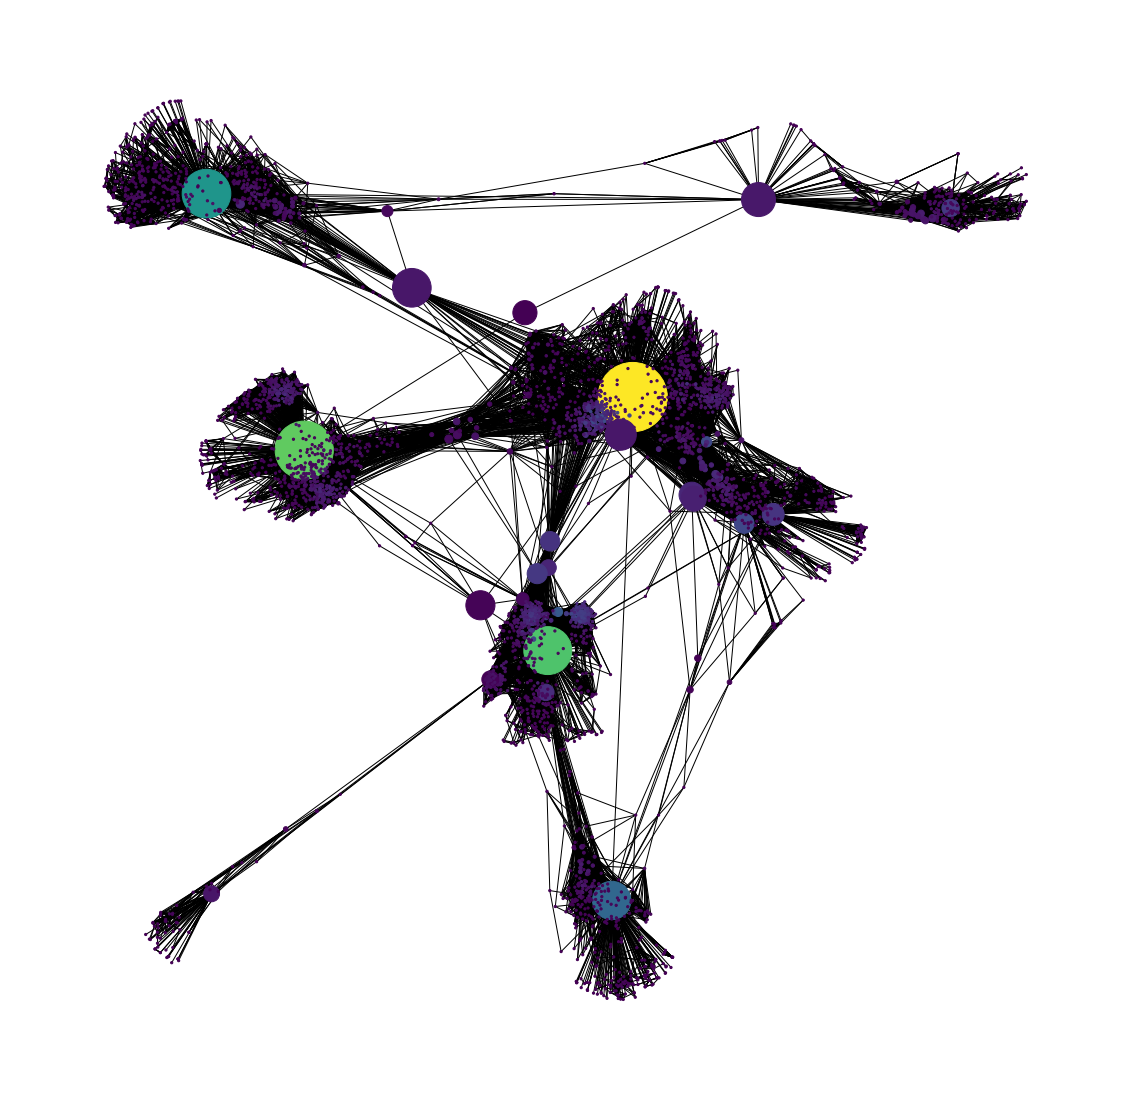

In [15]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized = True, endpoints= True)
node_color =[20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos = pos, with_labels=False,
                 node_color = node_color,
                 node_size = node_size)
plt.axis('off')